In [2]:
import requests
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from data_manager import get_stock_data, get_one_to_one_stock_data

In [3]:
f = open("../api_key.txt", "r")
api_key = f.readline()

In [17]:
def show_plots(opening, closing, pred, num=0):
    plt.plot(pd.to_datetime(opening['Dates'][-num:]), opening['Prices'][-num:])
    plt.plot(pd.to_datetime(closing['Dates'][-num:]), closing['Prices'][-num:])
    plt.plot(pd.to_datetime(pred['Dates'][-num:]), pred['Prices'][-num:])
    plt.legend(["opening", "closing", "pred"])
    plt.show()

In [3]:
def grab_my_predictions(company_label, pred_path):
    f = open(pred_path)
    pred_json = json.load(f)
    pred_data = {'Dates': [], 'Prices': []}
    for entry in pred_json:
        pred_data['Dates'].append(entry)
        pred_data['Prices'].append((pred_json[entry]))
    pred_data['Prices'] = np.array(pred_data['Prices']).astype(float)
    return pred_data

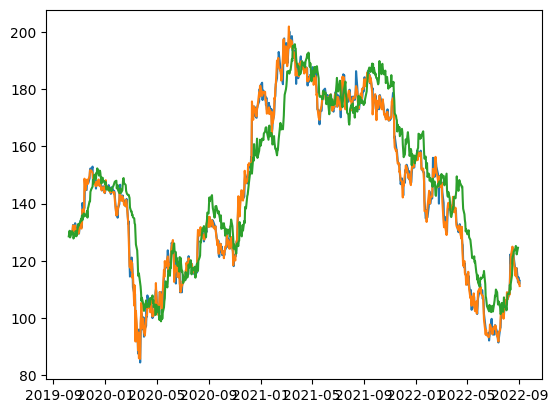

In [18]:
symbol = "DIS"
opening = get_stock_data(symbol, api_key, ohcl='1. open')
closing = get_stock_data(symbol, api_key)
pred = grab_my_predictions(symbol)
show_plots(opening, closing, pred, 730)

In [13]:
true_positive = true_negative = false_positive = false_negative = 0
for pred_index in range(0, len(pred['Dates'])):
    stock_index = opening['Dates'].index(pred['Dates'][pred_index])
    pred_buy = pred['Prices'][pred_index] > opening['Prices'][stock_index]
    actual_buy = closing['Prices'][stock_index] > opening['Prices'][stock_index]
    if pred_buy and actual_buy:
        true_positive += 1
    if pred_buy and not actual_buy:
        false_positive += 1
    if not pred_buy and not actual_buy:
        true_negative += 1
    if not pred_buy and actual_buy:
        false_negative += 1
print("True positive: " + str(true_positive))
print("True negative: " + str(true_negative))
print("False positive: " + str(false_positive))
print("False negative: " + str(false_negative))

True positive: 1771
True negative: 939
False positive: 1773
False negative: 896


In [16]:
total = 100
plus = 0
minus = 0
fee = 0.0075
lost = 0
for i in range(-730, 0):
    today = pred['Dates'][i]
    index = opening['Dates'].index(today)
    if closing['Prices'][index] * (1.0 - fee) > opening['Prices'][index]:
    #if pred['Prices'][i] * (1.0 - fee) > opening['Prices'][index]:
        stocks = total / opening['Prices'][index]
        total = closing['Prices'][index] * stocks * (1.0 - fee)
        lost += closing['Prices'][index] * stocks * fee
        print("On " + today + " bought " + 
              str(stocks) + " stocks at " + 
              str(opening['Prices'][index]) + " and sold at " + str(closing['Prices'][index]) + 
              ". Total now is " + str(total))
        if closing['Prices'][index] > opening['Prices'][index]:
            plus += 1
        if closing['Prices'][index] < opening['Prices'][index]:
            minus += 1

On 2019-10-16 bought 0.7706535141800247 stocks at 129.76 and sold at 130.86. Total now is 100.09136097410605
On 2019-11-01 bought 0.7641145199947023 stocks at 130.99 and sold at 132.75. Total now is 100.675431010327
On 2019-11-13 bought 0.7264787921080026 stocks at 138.58 and sold at 148.72. Total now is 107.23161151758488
On 2019-11-18 bought 0.7408056063391011 stocks at 144.75 and sold at 147.65. Total now is 108.55959816764852
On 2020-01-02 bought 0.7471924989169835 stocks at 145.29 and sold at 148.2. Total now is 109.90342387695073
On 2020-01-14 bought 0.7663581610553708 stocks at 143.41 and sold at 145.2. Total now is 110.44064094785054
On 2020-01-28 bought 0.8090889446728977 stocks at 136.5 and sold at 138.37. Total now is 111.11398499483094
On 2020-01-30 bought 0.8225182100439036 stocks at 135.09 and sold at 137.81. Total now is 112.50110026720422
On 2020-02-03 bought 0.8047864673238732 stocks at 139.79 and sold at 141.32. Total now is 112.87943038549318
On 2020-02-10 bought 0.8

In [7]:
print(plus)
print(minus)
print(total)
print(lost)

171
158
123.41910806050488
0.0
